In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import threshold_niblack, threshold_sauvola
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (8,8)

In [10]:
base_path = "/kaggle/input/datasets/andrewmvd/drive-digital-retinal-images-for-vessel-extraction/DRIVE"

for root, dirs, files in os.walk(base_path):
    print(root)
    break


/kaggle/input/datasets/andrewmvd/drive-digital-retinal-images-for-vessel-extraction/DRIVE


In [11]:
image_path = base_path + "/training/images/21_training.tif"
gt_path = base_path + "/training/1st_manual/21_manual1.gif"

original = cv2.imread(image_path)

ground_truth = cv2.imread(gt_path, 0)

ground_truth = (ground_truth > 0).astype(np.uint8)

print("Image Shape:", original.shape)
print("GT Shape:", ground_truth.shape)


Image Shape: (584, 565, 3)
GT Shape: (584, 565)


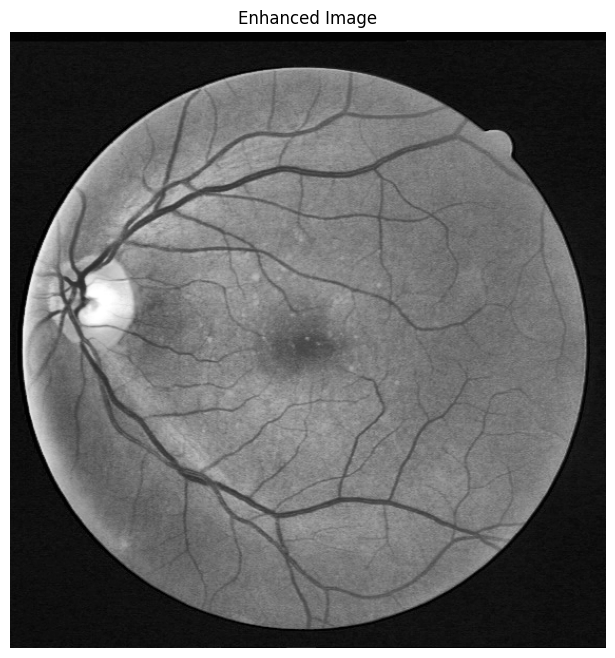

In [12]:
# Extract Green Channel
green_channel = original[:, :, 1]

# Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced = clahe.apply(green_channel)

# Normalize
normalized = cv2.normalize(enhanced, None, 0, 255, cv2.NORM_MINMAX)

plt.imshow(normalized, cmap='gray')
plt.title("Enhanced Image")
plt.axis("off")
plt.show()


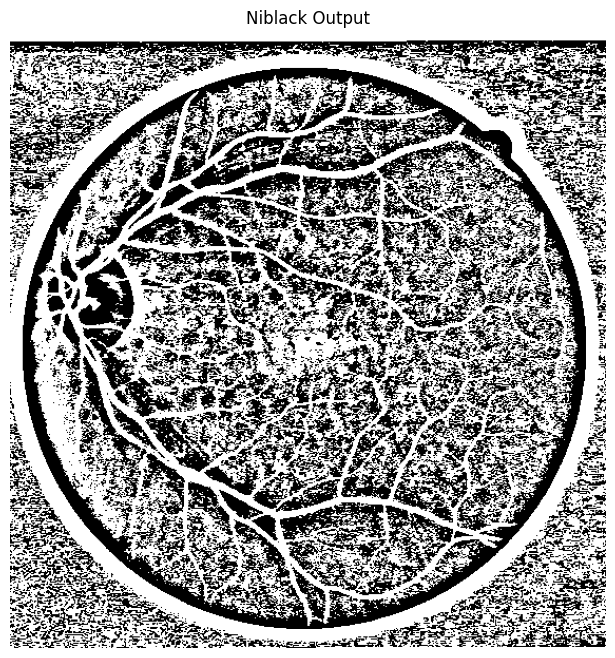

In [13]:
window_size = 25
k_niblack = -0.2

th_niblack = threshold_niblack(normalized, window_size=window_size, k=k_niblack)
binary_niblack = (normalized < th_niblack).astype(np.uint8)

plt.imshow(binary_niblack, cmap='gray')
plt.title("Niblack Output")
plt.axis("off")
plt.show()


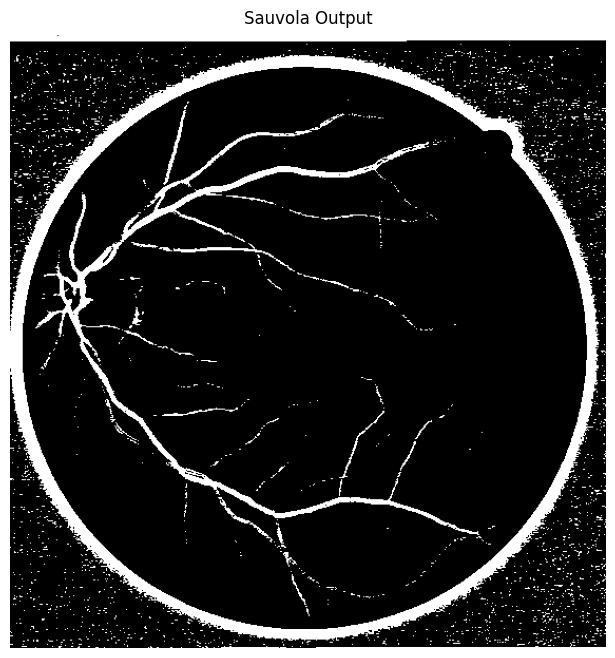

In [14]:
k_sauvola = 0.3

th_sauvola = threshold_sauvola(normalized, window_size=window_size, k=k_sauvola)
binary_sauvola = (normalized < th_sauvola).astype(np.uint8)

plt.imshow(binary_sauvola, cmap='gray')
plt.title("Sauvola Output")
plt.axis("off")
plt.show()


In [15]:
def compute_sensitivity(gt, pred):
    tn, fp, fn, tp = confusion_matrix(gt.flatten(), pred.flatten()).ravel()
    return tp / (tp + fn)

sens_niblack = compute_sensitivity(ground_truth, binary_niblack)
sens_sauvola = compute_sensitivity(ground_truth, binary_sauvola)

print("Sensitivity (Niblack):", sens_niblack)
print("Sensitivity (Sauvola):", sens_sauvola)


Sensitivity (Niblack): 0.9222159136994079
Sensitivity (Sauvola): 0.36410090031632736


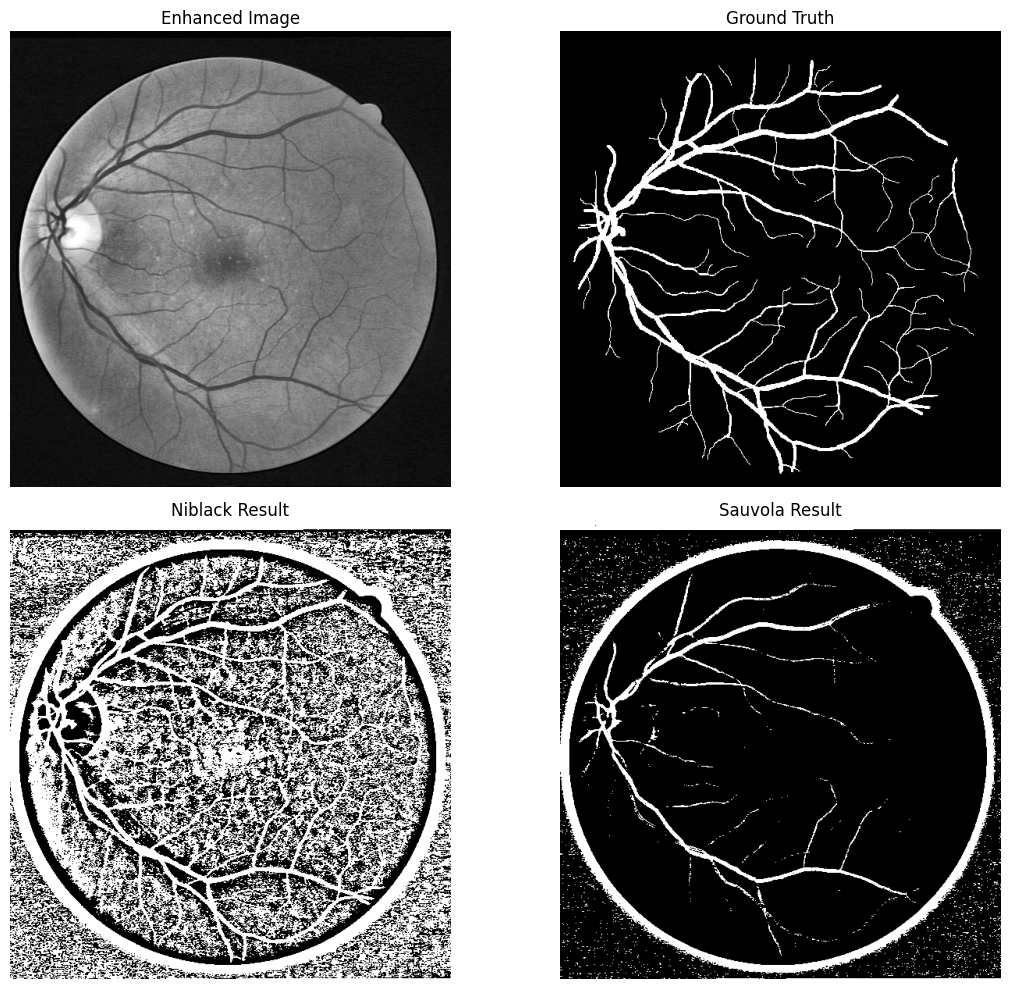

In [16]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.imshow(normalized, cmap='gray')
plt.title("Enhanced Image")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(ground_truth, cmap='gray')
plt.title("Ground Truth")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(binary_niblack, cmap='gray')
plt.title("Niblack Result")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(binary_sauvola, cmap='gray')
plt.title("Sauvola Result")
plt.axis("off")

plt.tight_layout()
plt.show()


In this assignment, retinal vessel segmentation was performed using adaptive local thresholding techniques on the DRIVE to extract thin blood vessels from fundus images. The preprocessing stage involved extracting the green channel from the RGB image, as it provides better contrast for vessel structures, followed by intensity normalization to stabilize pixel variations. Two adaptive methods, Niblack and Sauvola thresholding, were then applied to segment the vessels. Based on the computed sensitivity values, Niblack achieved higher sensitivity, indicating that it detected a greater number of actual vessel pixels, including thin vessels. However, this higher sensitivity resulted in more false positives, as several background pixels were incorrectly classified as vessels due to its strong dependence on local intensity variations. In comparison, Sauvola showed slightly lower sensitivity but produced cleaner segmentation with fewer false detections. Therefore, while Niblack performs better in terms of sensitivity, Sauvola provides a more balanced and visually stable segmentation result.